## Multiple Regression Model

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann, lecture 362-369, __[Multiple Regression Analysis](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/learn/lecture/17550812#overview)__.)*

### Regression Analysis - Multiple Regression Model

The purpose of Multiple Linear Regression is to explain (the variation in) a dependent variable by (the variation in) two or many independent variables.

In the example of the movie dataset:

- the dependent variable is Movie Revenue (Y)
- independent variables are Movie Budget, Runtime, Popularity, average Rating, etc... (X1, X2, X3)

__Setting up a multiple linear model:__

<img src="../assets/images/multiple_linear_model.png" width="50%" />

- we have the intercept a 
- we have for several independent variables from X<sub>1</sub> to X<sub>k</sub> (for instance, we could have the budget, then the runtime, and finally the rating)
- each and every independent variable has its own slope coefficient b<sub>1</sub> to b<sub>k</sub>
- and finally we have here an error term

#### Multiple Regression - Properties:

- A multiple regression model is hard to visualize because we are in a higher dimensional space
  
- Our regression model is an OLS Regression where we minimize the error terms (minimize MSE or SSE)

- *The **intercept (a)** is the value of the dependent variable when all the independent variables are equal to zero*
  
- The interpretation of the slope coefficients: **each Slope Coefficient (b)**
  - is the estimated change in the dependent variable for a one-unit change in that independent variable
  - assumes that we're holding the other independent variables constant. Therefore the slope coefficients in a multiple regression model are also called partial slope coefficients.
<br/><br/>

- We have two or more independent variables, and for each and every variable we have a slope coefficient. Therefore we have to conduct a t-test on each and every slope coefficient to determine the significance of each independent variable.

#### Some more implications:

- A multiple linear regression model captures correlations between independent variables: typically the independent variables are not completely uncorrelated. There might be a positive or negative correlation between some independent variables.

- If we add an additional independent variable to our model,
  - the usually the slope coefficients of other independent variables of our model change (they don't have to!)
  - the p-values of other independent variables (can) change
  - the significance of other independent variables (can) change

Let's take our example of a simple linear regression model with the dependent variable revenue and the independent variable budget. In this example budget is significant. If we add now an additional independent variable, for instance the average rating, this could lead to an increase of the p-value for the budget and therefore we could conclude that when adding an additional independent variable the budget is no longer significant and should be removed.

- Omitting important independent variable(s) can distort the model which means that we need to identify and select the right set of independent variables

- The downside of this is, if we had too many independent variables that are highly correlated, this can lead to ***multicollinearity*** and requires a model re-specification.

## Multiple Regression Analysis with Python

### The Movie Dataset - Preparing the Data

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
movie = pd.read_csv("../assets/data/movies_metadata.csv", low_memory= False)

In [109]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0000,81.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7000,5415.0000
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0000,104.0000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9000,2413.0000
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0000,101.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5000,92.0000
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0000,127.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1000,34.0000
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0000,106.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7000,173.0000


In [110]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [111]:
# converting the data type in the column release_date to datetime
# then creating a datetime index with set_index
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [112]:
# sorting the datetime index from past to present
movie.sort_index(inplace = True)
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0000,19.0000
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2000,25.0000
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4000,7.0000
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1000,17.0000
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4000,18.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,[],0.0000,76.0000,[],Released,NaN,Engineering Red,False,6.0000,2.0000
NaT,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,[],0.0000,74.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0000,1.0000
NaT,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,[],0.0000,0.0000,[],Released,NaN,The Land Where the Blues Began,False,0.0000,0.0000


In [113]:
# remove rows with NaT in the index
# otherwise the following step will cause an error
movie = movie[~movie.index.isna()]
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0000,19.0000
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2000,25.0000
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4000,7.0000
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1000,17.0000
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0000,1.0000,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4000,18.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-04,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",0.0000,105.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mobile Homes,False,0.0000,1.0000
2018-04-25,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",0.0000,0.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mary Shelley,False,0.0000,1.0000
2018-11-07,False,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0000,0.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.0000,12.0000


In [114]:
# selecting the period from 2010 to 2016
# selecting independent variables:  "budget", "runtime", "vote_average", "popularity"
# vote_average is a rating between 0 and 10 on the movies database
# popularity is the number of times a movie gets searched for or has been added to the wishlist on the movies database
df = movie.loc["2010":"2016", ["title", "budget", "revenue", "runtime", "vote_average", "popularity"]].copy()

In [115]:
df

,title,budget,revenue,runtime,vote_average,popularity
release_date,,,,,,
2010-01-01,Ca$h,7000000,46488.0000,108.0000,6.0000,9.107829
2010-01-01,Tokio Baby,0,0.0000,0.0000,2.0000,0.041176
2010-01-01,Radio Free Albemuth,3600000,0.0000,110.0000,5.3000,1.91768
2010-01-01,The Beast,0,0.0000,77.0000,8.0000,0.049089
2010-01-01,Brutal Relax,0,0.0000,15.0000,6.6000,0.941319
...,...,...,...,...,...,...
2016-12-29,To Walk Invisible,0,0.0000,120.0000,7.8000,3.792964
2016-12-29,The Snow Queen 3: Fire and Ice,0,0.0000,80.0000,8.5000,1.394369
2016-12-29,Viking,13000000,0.0000,133.0000,5.1000,3.880153


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12262 entries, 2010-01-01 to 2016-12-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         12262 non-null  object 
 1   budget        12262 non-null  object 
 2   revenue       12262 non-null  float64
 3   runtime       12178 non-null  float64
 4   vote_average  12262 non-null  float64
 5   popularity    12262 non-null  object 
dtypes: float64(3), object(3)
memory usage: 670.6+ KB


In [117]:
# transforming the data type in the budget column
df.budget = pd.to_numeric(df.budget, errors = "coerce")

In [118]:
# transforming the data type in the popularity column
df.popularity = pd.to_numeric(df.popularity, errors = "coerce")

In [119]:
# we only want movies with a revenue > 0 and a budget > 0
df = df[(df.revenue > 0) & (df.budget > 0)]

In [120]:
df

,title,budget,revenue,runtime,vote_average,popularity
release_date,,,,,,
2010-01-01,Ca$h,7000000,46488.0000,108.0000,6.0000,9.1078
2010-01-08,Leap Year,19000000,29922472.0000,100.0000,6.5000,7.4323
2010-01-12,Morning Glory,40000000,58785180.0000,102.0000,6.1000,10.7713
2010-01-13,Devil,10000000,33583175.0000,80.0000,5.8000,7.0943
2010-01-14,Tooth Fairy,48000000,112462508.0000,101.0000,5.2000,6.7447
...,...,...,...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40000000,312242626.0000,107.0000,5.9000,0.7557
2016-12-23,Railroad Tigers,50000000,102205175.0000,124.0000,6.2000,3.7985
2016-12-23,Dangal,10400000,310000000.0000,161.0000,8.0000,8.7921


In [121]:
df.set_index("title", inplace = True) # dropping the release date and setting the title as the new index

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1569 entries, Ca$h to 20th Century Women
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1569 non-null   int64  
 1   revenue       1569 non-null   float64
 2   runtime       1569 non-null   float64
 3   vote_average  1569 non-null   float64
 4   popularity    1569 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 73.5+ KB


In [123]:
# converting to million us$
df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000

/var/folders/7c/6tn50bjd30l3zb0p8_7mr94m0000gn/T/ipykernel_99523/647068271.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  7.   19.   40.  ...  10.4 108.    7. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000


In [124]:
df

,budget,revenue,runtime,vote_average,popularity
title,,,,,
Ca$h,7.0000,0.0465,108.0000,6.0000,9.1078
Leap Year,19.0000,29.9225,100.0000,6.5000,7.4323
Morning Glory,40.0000,58.7852,102.0000,6.1000,10.7713
Devil,10.0000,33.5832,80.0000,5.8000,7.0943
Tooth Fairy,48.0000,112.4625,101.0000,5.2000,6.7447
...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,107.0000,5.9000,0.7557
Railroad Tigers,50.0000,102.2052,124.0000,6.2000,3.7985
Dangal,10.4000,310.0000,161.0000,8.0000,8.7921


In [125]:
df.describe() # further analyzing the numerical columns

,budget,revenue,runtime,vote_average,popularity
count,1569.0000,1569.0000,1569.0000,1569.0000,1569.0000
mean,37.8906,115.6417,110.0300,6.2464,11.0693
std,50.0978,208.9668,21.7032,0.8571,18.4883
min,0.0000,0.0000,0.0000,0.0000,0.0162
25%,6.2000,5.7282,96.0000,5.7000,6.0912
50%,18.7000,35.6929,107.0000,6.3000,8.8967
75%,45.0000,122.5131,120.0000,6.8000,12.5727
max,380.0000,2068.2236,338.0000,9.0000,547.4883


In [126]:
df.corr() # pairwise correlation

,budget,revenue,runtime,vote_average,popularity
budget,1.0000,0.7960,0.1931,0.0754,0.2730
revenue,0.7960,1.0000,0.1786,0.2013,0.3998
runtime,0.1931,0.1786,1.0000,0.3235,0.0401
vote_average,0.0754,0.2013,0.3235,1.0000,0.1293
popularity,0.2730,0.3998,0.0401,0.1293,1.0000


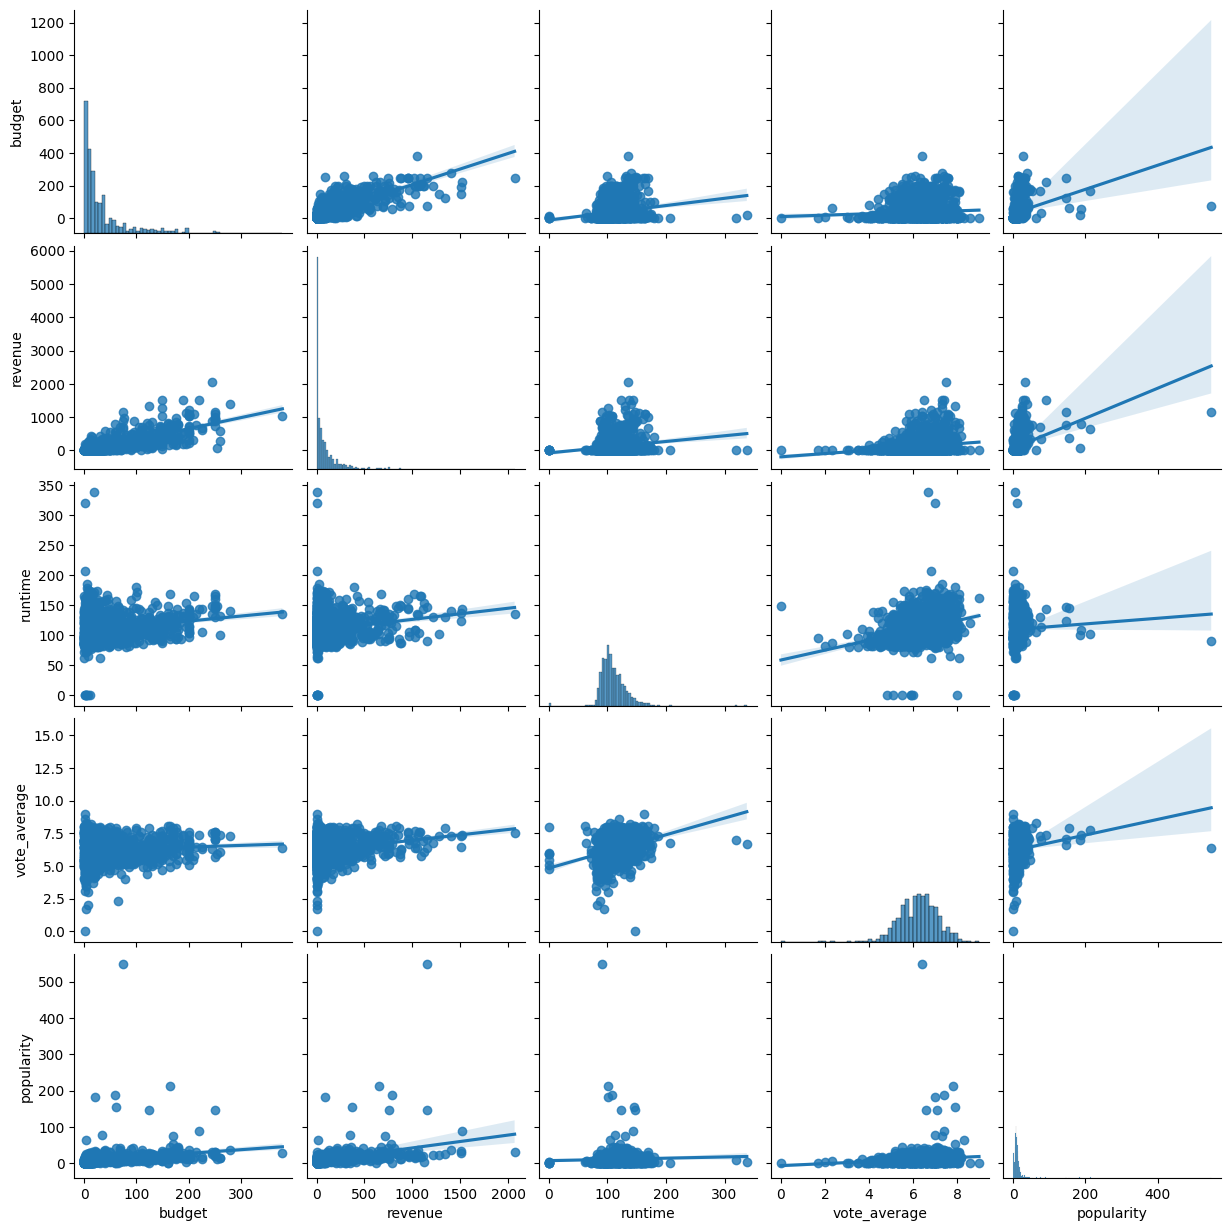

In [127]:
# performing pairwise simple linear regressions between pairs of two variables
# with seaborn pairplot, selecting regression as the kind of the pairplot: kind = "reg"
sns.pairplot(df, kind = "reg")
plt.show()

__Let's focus on our dependent variable revenue among the many simple linear regression models that we've created:__

- there is an upward sloping regression line between revenue and the budget

- also a significant upward sloping regression line between revenue and runtime seems to be significant (because of the confidence intervals)

- and also between revenue and vote average and between revenue and popularity

__Conclusion:__ based on isolated simple linear regression models between the dependent variables and the independent variable, it seems that all independent variables have a positive slope and that all independent variables are significant.

But even if an independent variable is significant in a simple linear regression model, it could be the case that in a multiple regression model, the same independent variable is not significant.

## Multiple Regression Analysis (OLS) with statsmodels

In [128]:
df

,budget,revenue,runtime,vote_average,popularity
title,,,,,
Ca$h,7.0000,0.0465,108.0000,6.0000,9.1078
Leap Year,19.0000,29.9225,100.0000,6.5000,7.4323
Morning Glory,40.0000,58.7852,102.0000,6.1000,10.7713
Devil,10.0000,33.5832,80.0000,5.8000,7.0943
Tooth Fairy,48.0000,112.4625,101.0000,5.2000,6.7447
...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,107.0000,5.9000,0.7557
Railroad Tigers,50.0000,102.2052,124.0000,6.2000,3.7985
Dangal,10.4000,310.0000,161.0000,8.0000,8.7921


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1569 entries, Ca$h to 20th Century Women
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1569 non-null   float64
 1   revenue       1569 non-null   float64
 2   runtime       1569 non-null   float64
 3   vote_average  1569 non-null   float64
 4   popularity    1569 non-null   float64
dtypes: float64(5)
memory usage: 105.8+ KB


In [130]:
from statsmodels.formula.api import ols

In [131]:
# for the ols function of statsmodels we have to define a formula as this string
# first we have the revenue column where we have the dependent variable 
# we have budget as the first independent variable and then we add some more independent variables with the plus sign
# we take all the data from the dataframe df
model = ols("revenue ~ budget + runtime + vote_average + popularity", data = df) # creating a multiple linear regression model

In [132]:
model

In [133]:
results = model.fit() # fitting the model

In [134]:
results.params # getting the regression coefficients
# we get the intercept and the slopes for the independent variables

Intercept      -202.8857
budget            3.0830
runtime          -0.1174
vote_average     30.7117
popularity        2.0592
dtype: float64

#### Visualizing and comparing the actual values for the dependent variable and the forecasted values

In [135]:
#  creating the values forecasted by the regression model with the predict method
results.predict()

array([  9.03687126,  58.87850165, 117.97799931, ...,  74.06821345,
       346.41242563,  49.2107336 ])

In [136]:
# inserting the new column predict before the index position
df.insert(loc = 2, column = "predict", value = results.predict())

In [137]:
df

,budget,revenue,predict,runtime,vote_average,popularity
title,,,,,,
Ca$h,7.0000,0.0465,9.0369,108.0000,6.0000,9.1078
Leap Year,19.0000,29.9225,58.8785,100.0000,6.5000,7.4323
Morning Glory,40.0000,58.7852,117.9780,102.0000,6.1000,10.7713
Devil,10.0000,33.5832,11.2857,80.0000,5.8000,7.0943
Tooth Fairy,48.0000,112.4625,106.8278,101.0000,5.2000,6.7447
...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,90.6249,107.0000,5.9000,0.7557
Railroad Tigers,50.0000,102.2052,134.9379,124.0000,6.2000,3.7985
Dangal,10.4000,310.0000,74.0682,161.0000,8.0000,8.7921


In [138]:
# distance between actual value and predicted value are the residuals
df.revenue - df.predict

title
Ca$h                                 -8.9904
Leap Year                           -28.9560
Morning Glory                       -59.1928
Devil                                22.2974
Tooth Fairy                           5.6347
                                      ...   
Resident Evil: The Final Chapter    221.6177
Railroad Tigers                     -32.7327
Dangal                              235.9318
Live by Night                      -323.7339
20th Century Women                  -43.3945
Length: 1569, dtype: float64

In [139]:
results.resid # residuals from statsmodels

title
Ca$h                                 -8.9904
Leap Year                           -28.9560
Morning Glory                       -59.1928
Devil                                22.2974
Tooth Fairy                           5.6347
                                      ...   
Resident Evil: The Final Chapter    221.6177
Railroad Tigers                     -32.7327
Dangal                              235.9318
Live by Night                      -323.7339
20th Century Women                  -43.3945
Length: 1569, dtype: float64

In [140]:
# to actually visualize actual values versus forecasted values
# first let's sort the rows by the revenue column and reset the index to a range index
# re-sortig by the revenue column from low to high
df = df.sort_values("revenue").reset_index()

In [141]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.0000,0.0000,-39.6750,114.0000,5.6000,2.2403
1,All at Once,0.7500,0.0000,-15.8879,0.0000,6.0000,0.2016
2,Duniyadari,0.3900,0.0000,-219.0310,148.0000,0.0000,0.0162
3,Raja Natwarlal,0.0000,0.0000,-48.2454,141.0000,5.5000,1.1095
4,Bodyguard,0.0001,0.0000,-53.5053,130.0000,5.2000,2.4020
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.0000,1405.4037,944.9699,141.0000,7.3000,37.3794
1565,Furious 7,190.0000,1506.2494,647.1617,137.0000,7.3000,27.2757
1566,Jurassic World,150.0000,1513.5288,512.1535,124.0000,6.5000,32.7905
1567,The Avengers,220.0000,1519.5579,870.9466,143.0000,7.4000,89.8876


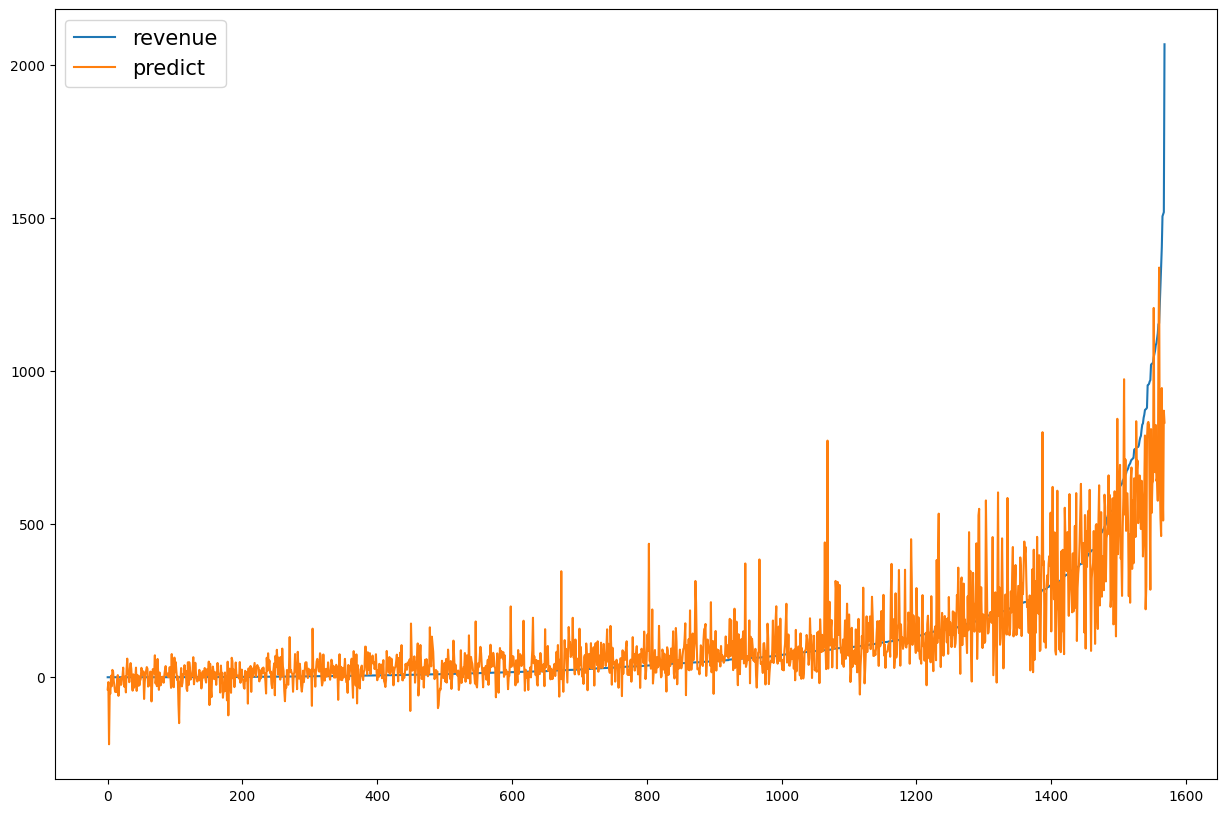

In [142]:
# creating a line plot for the revenue column and also for the predict column
df.loc[:, ["revenue", "predict"]].plot(figsize = (15, 10))
plt.legend(fontsize = 15)
plt.show()

In [143]:
results.ssr # sum of squared errors

np.float64(21611479.348156683)

In [144]:
results.mse_resid # mean squared error in square units

np.float64(13818.081424652612)

In [145]:
# as the mean squared error in square units we take the square root to get a number that we can interpret
# by taking the square root we get to 170 and million dollar.
# which is actually the mean of the average error of our regression model
# so on average the the truer revenue is plus or minus 117 million away from the predicted values.
    
results.mse_resid**0.5

np.float64(117.55033570625228)

***The mean error seems to be pretty high but to evaluate and to verify the fit of our model we need to calculate the coefficient of determination.***

### Regression Coefficients, Hypothesis Testing & Model Specification

In [148]:
pd.options.display.float_format = '{:.4f}'.format

In [149]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.0000,0.0000,-39.6750,114.0000,5.6000,2.2403
1,All at Once,0.7500,0.0000,-15.8879,0.0000,6.0000,0.2016
2,Duniyadari,0.3900,0.0000,-219.0310,148.0000,0.0000,0.0162
3,Raja Natwarlal,0.0000,0.0000,-48.2454,141.0000,5.5000,1.1095
4,Bodyguard,0.0001,0.0000,-53.5053,130.0000,5.2000,2.4020
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.0000,1405.4037,944.9699,141.0000,7.3000,37.3794
1565,Furious 7,190.0000,1506.2494,647.1617,137.0000,7.3000,27.2757
1566,Jurassic World,150.0000,1513.5288,512.1535,124.0000,6.5000,32.7905
1567,The Avengers,220.0000,1519.5579,870.9466,143.0000,7.4000,89.8876


In [150]:
results.params

Intercept      -202.8857
budget            3.0830
runtime          -0.1174
vote_average     30.7117
popularity        2.0592
dtype: float64

In [151]:
results.tvalues

Intercept      -8.6450
budget         49.1353
runtime        -0.7983
vote_average    8.3246
popularity     12.2409
dtype: float64

In [152]:
results.pvalues

Intercept      0.0000
budget         0.0000
runtime        0.4248
vote_average   0.0000
popularity     0.0000
dtype: float64

In [153]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     847.8
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:41:25   Log-Likelihood:                -9703.0
No. Observations:                1569   AIC:                         1.942e+04
Df Residuals:                    1564   BIC:                         1.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -202.8857     23.469     -8.645   

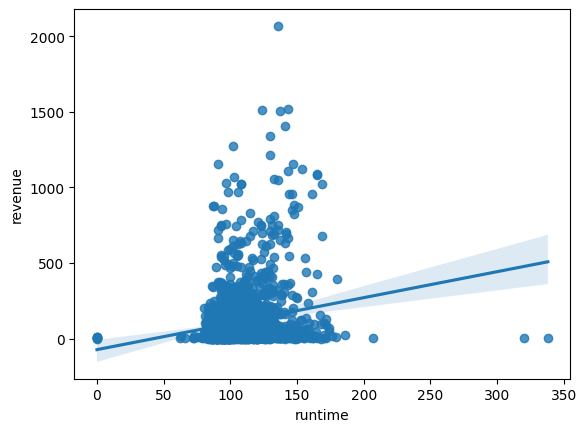

In [154]:
sns.regplot(x = "runtime", y = "revenue", data = df)
plt.show()

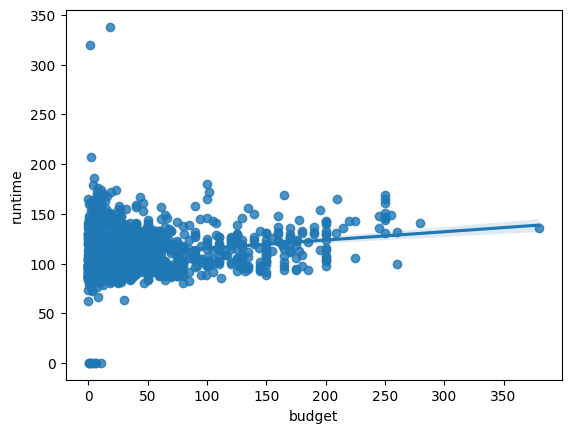

In [155]:
sns.regplot(x = "budget", y = "runtime", data = df)
plt.show()

In [156]:
# for the ols function of statsmodels we have to define a formula as this string
# first we have the revenue column where we have the dependent variable 
# we have budget as the first independent variable and then we add some more independent variables with the plus sign
# we take all the data from the dataframe df
model = ols("revenue ~  budget + vote_average + popularity", data = df) # creating a multiple linear regression model

In [157]:
results = model.fit() # fitting the model

In [158]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:41:26   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   

### The F-Test

In [159]:
results.fvalue

np.float64(1130.4187152050447)

In [160]:
results.f_pvalue

np.float64(0.0)

In [161]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:41:26   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   

## Coefficient of Determination - 𝑅<sup>2</sup> & Adjusted 𝑅<sup>2</sup>

#### __How well does the model fit the data & explain the dependent variable?__

𝑅<sup>2</sup> is defined as the **proportion of the variation in the dependent variable** that is collectively
explained by all of the independent variables (or the regression model).

<img src="../assets/images/r_squared_formula_2.png" width="50%" />

The problem that we have here is, that 𝑅<sup>2</sup> may not be a reliable measure of the explanatory power of the multiple regression model. The reason for this is that *𝑅<sup>2</sup> almost always increases as variables are added to the model, even if the marginal contribution of the new variables is not significant.*

The solution for this is to use the __Adjusted 𝑅<sup>2</sup>__ instead of 𝑅<sup>2</sup>. When we add new variables to the model the **Adjusted 𝑅<sup>2</sup> increases or decreases depending on the new variable's marginal contribution**.

__Therefore the Adjusted 𝑅<sup>2</sup> is always less than 𝑅<sup>2</sup>.__

<img src="../assets/images/adjusted_r_squared_formula.png" width="80%" />


In [162]:
results.rsquared

np.float64(0.6842374659379588)

In [163]:
results.rsquared_adj

np.float64(0.6836321703455075)

In our example the Adjusted 𝑅<sup>2</sup> (68.36 %) is only slightly lower than 𝑅<sup>2</sup> (68.42 %).

***We can conclude, that the four independent variables and our model as a whole explain 68.36 % of the total variation in the independent variable.***